# Customer Segmentation Using K-means Clustering

**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

**Loading the dataset**

In [2]:
data = pd.read_excel('Online Retail.xlsx')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


**Selecting features and handling missing values**

In [4]:
features = ['Quantity', 'UnitPrice', 'Country']
data = data[features].dropna()

**Encoding country feature to numeric value**

In [5]:
data['Country'] = data['Country'].astype('category').cat.codes

**Standardizing the features**

In [6]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

**Applying K-means Clustering**

In [9]:
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)
data['Cluster']

0         0
1         0
2         0
3         0
4         0
         ..
541904    3
541905    3
541906    3
541907    3
541908    3
Name: Cluster, Length: 541909, dtype: int32

**Visualizing the results**

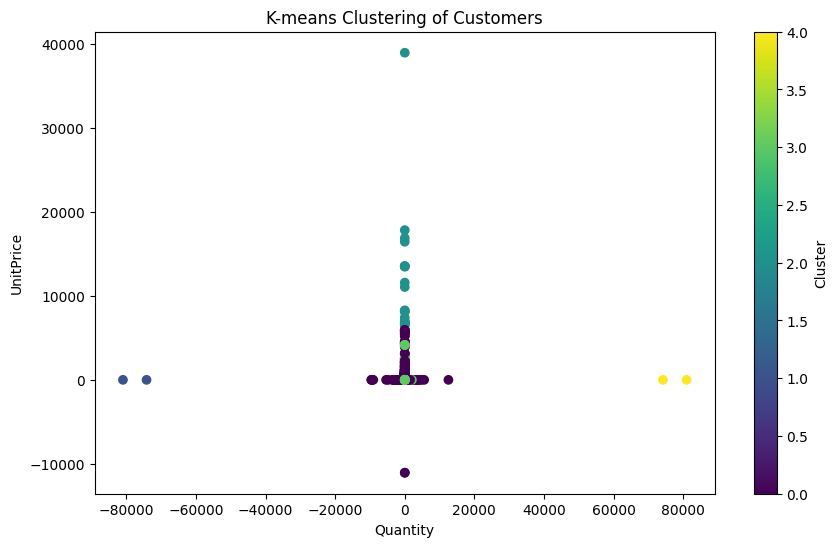

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Quantity'], data['UnitPrice'], c=data['Cluster'], cmap='viridis', marker='o')
plt.title('K-means Clustering of Customers')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.colorbar(label='Cluster')
plt.show()